In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1 = pd.read_csv('steps.csv', sep=';', engine='python')
df1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [9]:
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [39]:
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis = 1).to_frame() 

mean_steps.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            919, 920, 921, 922, 923, 924, 925, 926, 927, 928],
           dtype='int64', length=929)

In [26]:
dff = pd.DataFrame(np.random.randn(1,2),columns=list('AB'))

dff.mean(axis=0)

A   -0.970528
B    0.742259
dtype: float64

In [40]:
mean_steps.rename(columns={0:'mean_steps'}, inplace = True)

In [42]:
def filtermeansteps(x):
    if(x > 100000.0 or x < 1500.0 ): 
        return float('NaN')
    else: 
        return x
    
mean_steps["mean_steps"] = mean_steps["mean_steps"].apply(filtermeansteps)

In [43]:
mean_steps["mean_steps"].sort_values().dropna()


712     1598.000000
499     1612.300000
155     1619.800000
396     1745.333333
320     1762.000000
           ...     
834    20414.067039
109    22842.716846
205    30373.808917
881    43912.307692
95     58491.067568
Name: mean_steps, Length: 916, dtype: float64

In [48]:
df1 = df.loc[:,['id','weight','height']]

In [49]:
df2 = pd.merge(df1,mean_steps, left_index=True, right_index=True)
df2

,id,weight,height,mean_steps
0,1,98.0,178.0,10205.521212
1,2,77.0,180.0,5687.423313
2,3,83.0,180.0,8301.729730
3,4,80.0,178.0,3633.200000
4,5,61.0,167.0,5312.129630
...,...,...,...,...
924,925,59.0,165.0,6282.131868
925,926,90.0,192.0,4799.880000
926,927,71.0,181.0,10030.326829
927,928,65.0,172.0,15679.679012


In [50]:
corr = df2[['weight', 'mean_steps', 'height']].corr() 
corr

,weight,mean_steps,height
weight,1.000000,-0.074104,0.508194
mean_steps,-0.074104,1.000000,-0.100674
height,0.508194,-0.100674,1.000000


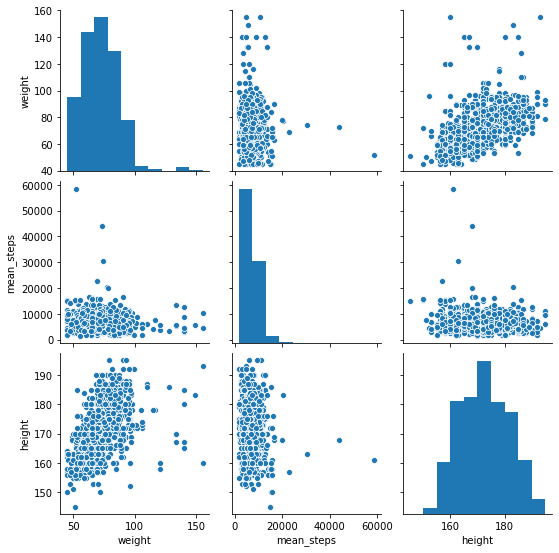

In [51]:
pairplot1= df2[['weight', 'mean_steps', 'height']]
sns.pairplot(pairplot1)
plt.show()

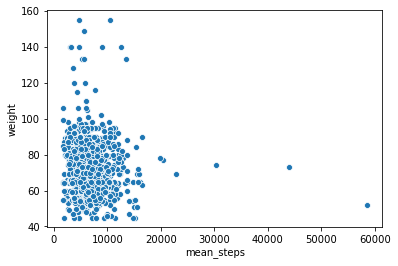

In [52]:
sns.scatterplot(data=df2, x="mean_steps", y="weight")